In [7]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor, bpass, wowcolor
from skimage import io, measure
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
from miscLib import label_slope
import matplotlib
import typesetting.main as tm
tm.prl('1-column-2-panel')
import cv2
import pandas as pd
import corrLib

In [52]:
def autocorr_imseq(seq):
    """
    Compute intensity autocorrelation of an image sequence.
    
    Args:
    seq -- image sequence, a DataFrame table containing a set of image names and directories. Return value of corrLib.readseq()
    
    Returns:
    ac_mean -- the autocorrelation
    """
    def autocorr(x):
        x = (x-x.mean()) / x.std()
        result = np.correlate(x, x, mode='full')/len(x)
        return result[len(result)//2:]
    
    samples = []
    for num, i in seq.iterrows():
            X, Y, I = corrLib.divide_windows(io.imread(i.Dir), windowsize=[50, 50], step=300)
            samples.append(I)
    stack = np.stack(samples)
    r = stack.reshape((stack.shape[0], stack.shape[1]*stack.shape[2])).transpose()
    ac_list = []
    for x in r:
        ac = autocorr(x)
        ac_list.append(ac)
    ac_stack = np.stack(ac_list)
    ac_mean = ac_stack.mean(axis=0)
    return ac_mean

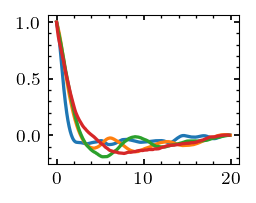

In [53]:
num_list = [1, 4, 7, 10]
range_list = [(3000, 3600), (3000, 3600), (1600, 1800), (1600, 1800)]
fps_list = [30, 30, 10, 10]
for n, r, fps in zip(num_list, range_list, fps_list):
    folder =r'D:\density_fluctuations\08032020\{:02d}\8-bit'.format(n)
    l = corrLib.readseq(folder)
    seq = l.loc[(l.Name.astype('int')>r[0])&(l.Name.astype('int')<r[1])]
    ac = autocorr_imseq(seq)
    t = np.array(range(0, len(ac))) / fps
    plt.plot(t, ac)